#  VGG Architecture : 


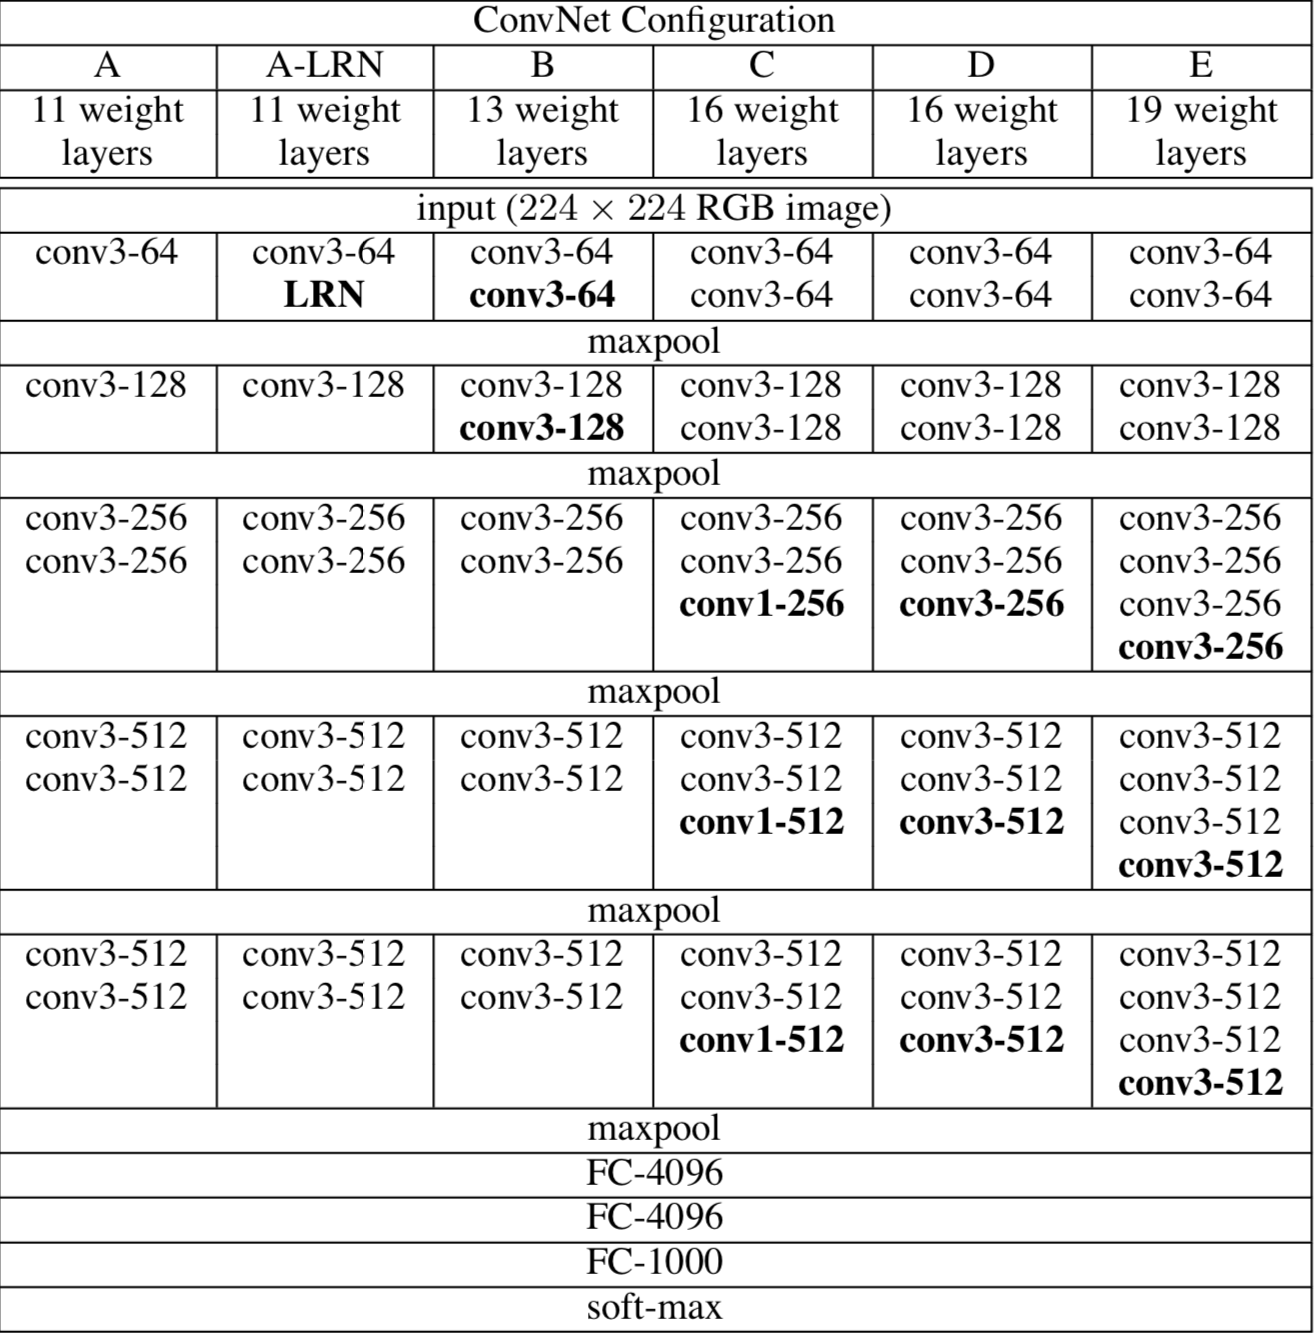


In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np


In [14]:
VGG_types = {
    "VGG11" : [64,"M",128,"M",256,256,"M",512,512,"M",512,512,"M"],
    "VGG13" : [64,64,"M",128,128,"M",256,256,"M",512,512,"M",512,512,"M"],
    "VGG16" : [64,64,"M",128,128,"M",256,256,256,"M",512,512,512,"M",512,512,512,"M"],
    "VGG19" : [64,64,"M",128,128,"M",256,256,256,256,"M",512,512,512,512,"M",512,512,512,512,"M"]
}


#VGG16 = 
#then Flatten and 3: FC (4096)
class VGGNet(tf.keras.Model):

  def __init__(self, num_classes=1000):
    super(VGGNet, self).__init__()
    self.convLayers = self.create_conv_layers(VGG_types["VGG16"])
    self.fcs= keras.Sequential([
                                layers.Flatten(),
                                layers.Dense(4096, activation="relu"),
                                layers.Dense(4096, activation="relu"),
                                layers.Dense(num_classes, activation="softmax"),
    ])

#We also add dropout layers or BatchNormalization layers .. 

  def create_conv_layers(self, architecture):
    layers_C =[]
    for x in architecture:
      if type(x) == int:
        layer = keras.layers.Conv2D(filters=x,
                              kernel_size=(3,3),
                              strides =(1,1),
                              padding="same")
        layers_C.append(layer)
      elif x == "M":
        layer = layers.MaxPooling(pool_size=(2,2), strides=[2,2])
        layers_C.append(layer)
      return keras.Sequential(*layers_C)


  def call(self, inputs, training=False):
    x = self.convLayers(inputs)
    x = self.fcs(x)
    return x

model = VGGNet(num_classes=1000)

In [15]:
x = tf.random.uniform((1,3,224,224))

In [16]:
print(model(x).shape)

(1, 1000)
